In [1]:
import datetime
import h5py
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import tables
from tqdm import tqdm
%matplotlib inline
import random
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# time vs probability correct
# interbout interval in conditions
# interbout interval histogram
#

In [77]:
df = pd.read_hdf(r"C:\Users\ag-bahl\Desktop\sine_gratings_8_directions\data_preprocessed_sine_8.hdf5")
df['duration'] = df['duration'].astype(np.float64)
df['distance_change'] = df['distance_change'].astype(np.float64)

df.reset_index(inplace = True)
print('done all data')

done all data


In [5]:


df_motion_downward =df[df['stimulus_name']=='motion_downward']
df_motion_forward =df[df['stimulus_name']=='motion_forward']
df_motion_leftdown45 = df[df['stimulus_name']=='motion_leftdown45']
df_motion_leftup45 = df[df['stimulus_name']=='motion_leftup45']
df_motion_leftward = df[df['stimulus_name']=='motion_leftward']
df_motion_rightdown45 = df[df['stimulus_name']=='motion_rightdown45']
df_motion_rightup45 = df[df['stimulus_name']=='motion_rightup45']
df_motion_rightward =  df[df['stimulus_name']=='motion_rightward']

In [20]:
df_subset =df[df['stimulus_name']=="motion_downward"]
#bin_df_subset = bin_data(label_df= df_subset, bin_size = 1,subset = False)
#bin_df_again = bin_df_subset.groupby(['binned_time']).sum()
#bin_df_again.reset_index(inplace = True)
#plt.plot(bin_df_again['binned_time'],bin_df_again['total_bouts'])
fishes = df_subset['fish_ID'].unique().tolist()
for fish in fishes:
    [df_subset["fish_ID"]==fish]



,index,setup_index,arena_index,experiment_repeat,fish_ID,folder_name,fish_genotype,fish_age,stimulus_name,trial,...,radius,estimated_orientation_change_flipped,time,left_bouts,right_bouts,straight_bouts,bout_orientation,bout_orientation_absolute,left_bouts_absolute,right_bouts_absolute
818,818,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,motion_downward,0,...,0.909768,71.104073,0.175858,1.0,0.0,0.0,1.0,1.0,1.0,0.0
819,819,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,motion_downward,0,...,0.839637,-409.350013,0.553632,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0
820,820,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,motion_downward,0,...,0.828864,35.821769,6.086921,1.0,0.0,0.0,1.0,1.0,1.0,0.0
821,821,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,motion_downward,0,...,0.820026,20.780346,7.575798,1.0,0.0,0.0,1.0,1.0,1.0,0.0
822,822,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,motion_downward,0,...,0.814652,33.901456,9.275784,1.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835798,835798,1,7,0,106,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_downward,8,...,0.929557,NaN,48.216791,NaN,NaN,NaN,NaN,NaN,NaN,NaN
835799,835799,1,7,0,106,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_downward,8,...,NaN,NaN,48.661232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
835800,835800,1,7,0,106,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_downward,8,...,0.929432,2.094854,48.86123,1.0,0.0,0.0,1.0,1.0,1.0,0.0
835801,835801,1,7,0,106,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_downward,8,...,NaN,NaN,48.961229,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
plt.rcParams["figure.figsize"] = (9,6)
stim = df['stimulus_name'].unique().tolist()
for stimulus in stim:
    df_subset =df[df['stimulus_name']==stimulus]
    df_maximums = df_subset.groupby(['fish_ID']).max()
    print('Number of trials for stimulus '+str(stimulus)+': ' +str(sum(df_maximums['trial'])))
    print('Number of fish: ' + str(len(df_maximums)))
    bin_df_subset = bin_data(label_df= df_subset, bin_size = 1,subset = False)
    bin_df_again = bin_df_subset.groupby(['binned_time']).sum()
    bin_df_again.reset_index(inplace = True)
    plt.plot(bin_df_again['binned_time'],bin_df_again['total_bouts'])
    plt.scatter([0,0],[1100,2800], color = 'dimgray')
    plt.title('Trial stimulus '+str(stimulus),size = 15)
    plt.xlabel('binned time',size = 15)
    plt.ylabel('total bouts', size = 15)
    plt.show() # 2800 1100

Number of trials for stimulus gray: 1643
Number of fish: 106


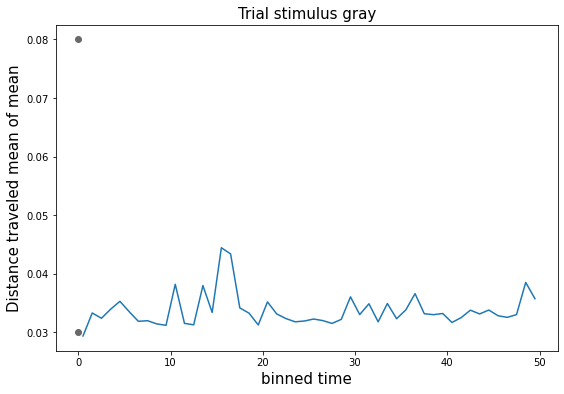

Number of trials for stimulus motion_downward: 1647
Number of fish: 107


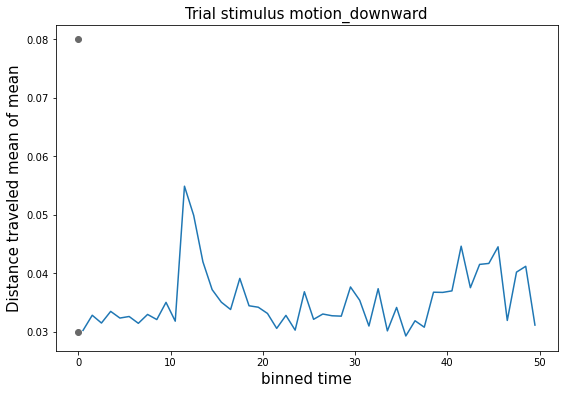

Number of trials for stimulus motion_forward: 1708
Number of fish: 107


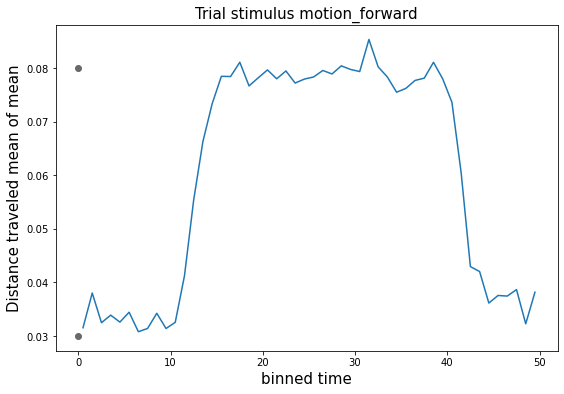

Number of trials for stimulus motion_leftdown45: 1714
Number of fish: 107


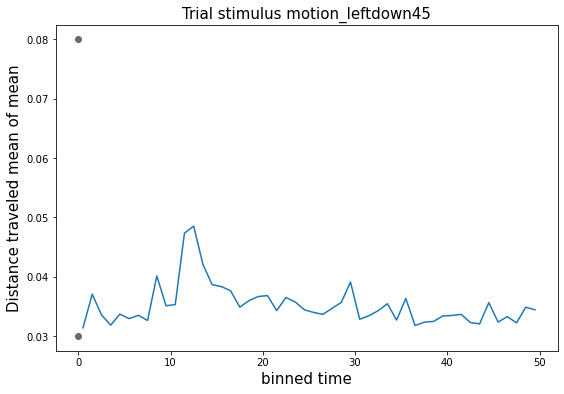

Number of trials for stimulus motion_leftup45: 1667
Number of fish: 106


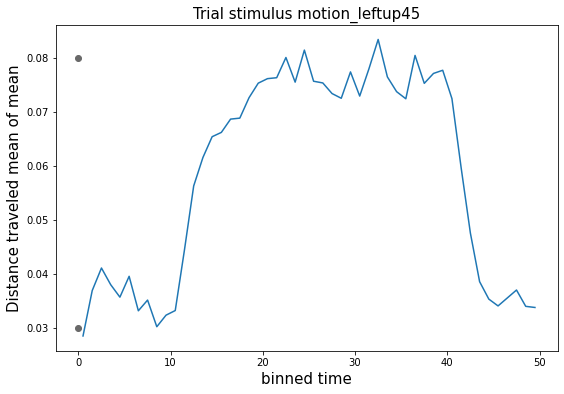

Number of trials for stimulus motion_leftward: 1747
Number of fish: 107


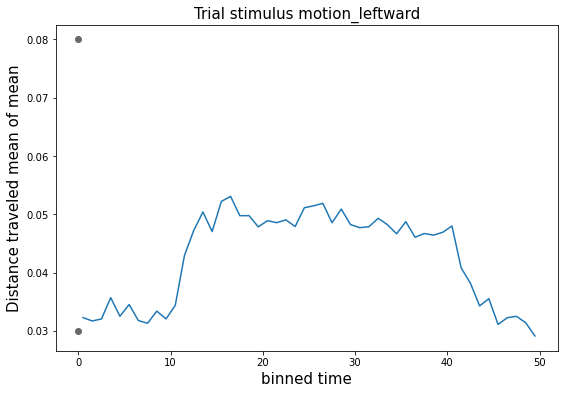

Number of trials for stimulus motion_rightdown45: 1683
Number of fish: 106


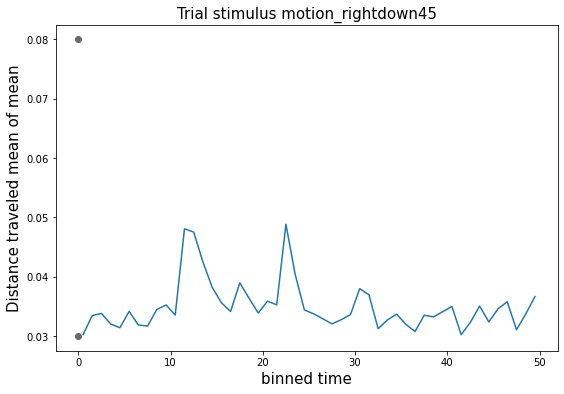

Number of trials for stimulus motion_rightup45: 1636
Number of fish: 107


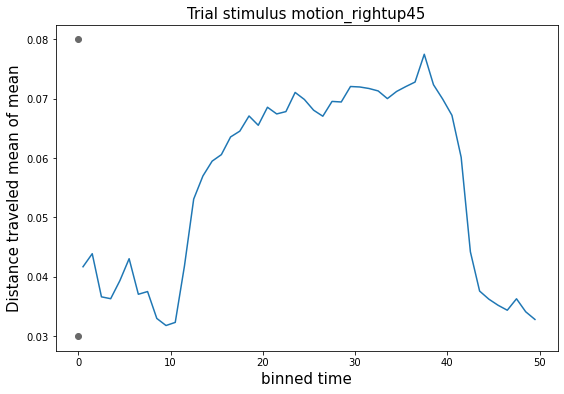

Number of trials for stimulus motion_rightward: 1618
Number of fish: 107


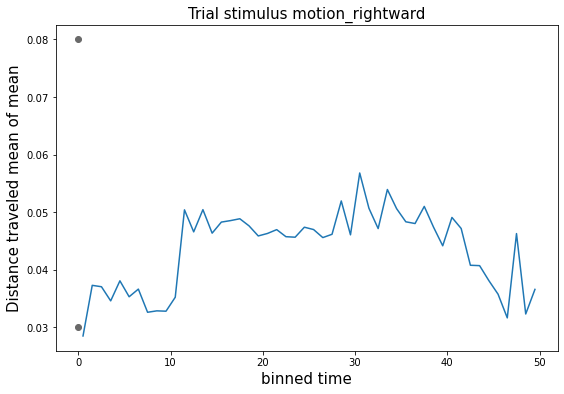

In [81]:
# All the same for bout distance traveled?

plt.rcParams["figure.figsize"] = (9,6)
stim = df['stimulus_name'].unique().tolist()
for stimulus in stim:
    df_subset =df[df['stimulus_name']==stimulus]
    df_maximums = df_subset.groupby(['fish_ID']).max()
    print('Number of trials for stimulus '+str(stimulus)+': ' +str(sum(df_maximums['trial'])))
    print('Number of fish: ' + str(len(df_maximums)))
    bin_df_subset = bin_data(label_df= df_subset, bin_size = 1,subset = False)
    bin_df_again = bin_df_subset.groupby(['binned_time']).mean()  # again the mean
    bin_df_again.reset_index(inplace = True)
    plt.plot(bin_df_again['binned_time'],bin_df_again['distance_change'])
    plt.scatter([0,0],[0.03,0.08], color = 'dimgray')
    plt.title('Trial stimulus '+str(stimulus),size = 15)
    plt.xlabel('binned time',size = 15)
    plt.ylabel('Distance traveled mean of mean', size = 15)
    plt.show() # 2800 1100

Number of trials for stimulus gray: 1643
Number of fish: 106


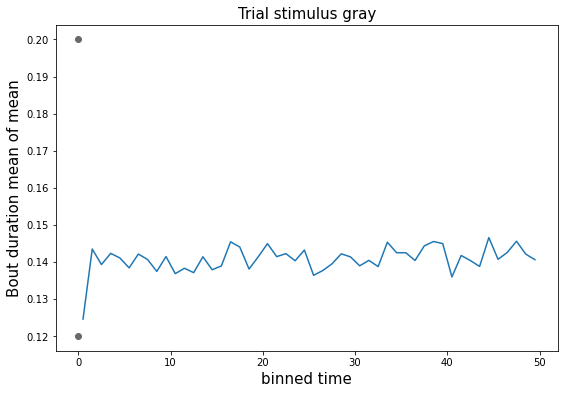

Number of trials for stimulus motion_downward: 1647
Number of fish: 107


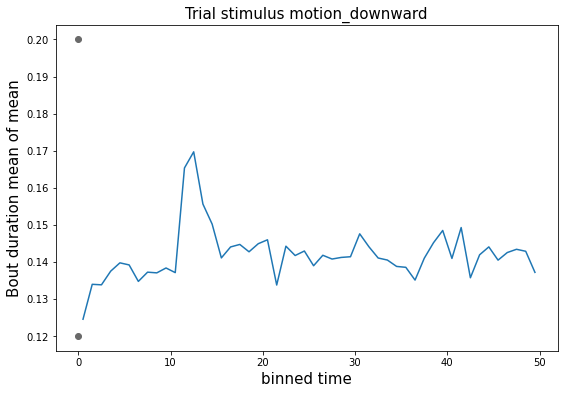

Number of trials for stimulus motion_forward: 1708
Number of fish: 107


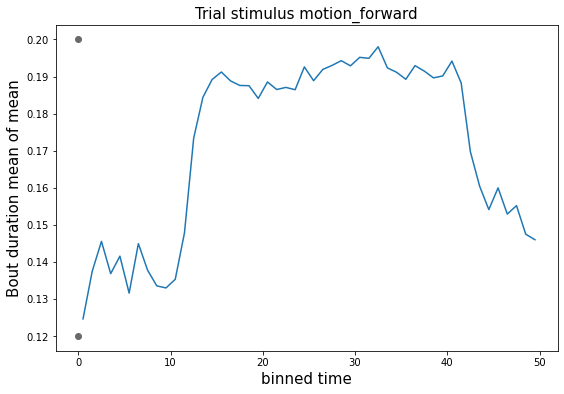

Number of trials for stimulus motion_leftdown45: 1714
Number of fish: 107


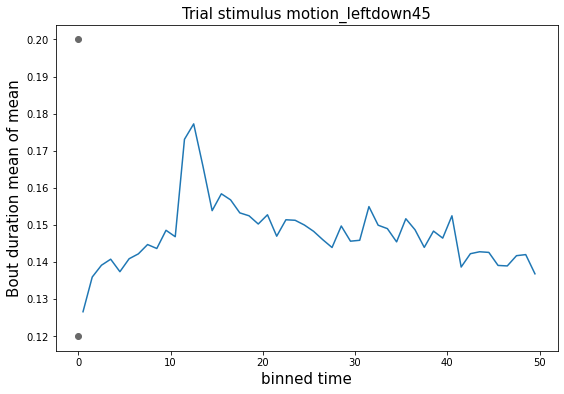

Number of trials for stimulus motion_leftup45: 1667
Number of fish: 106


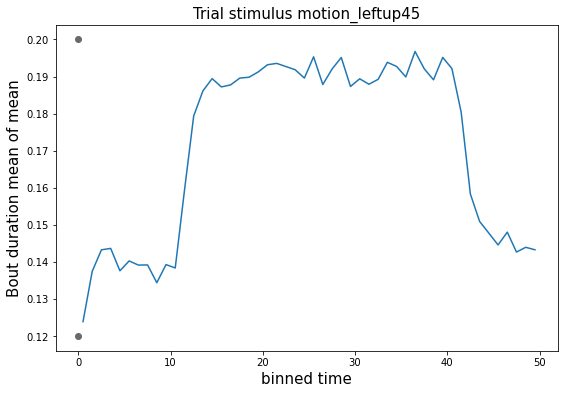

Number of trials for stimulus motion_leftward: 1747
Number of fish: 107


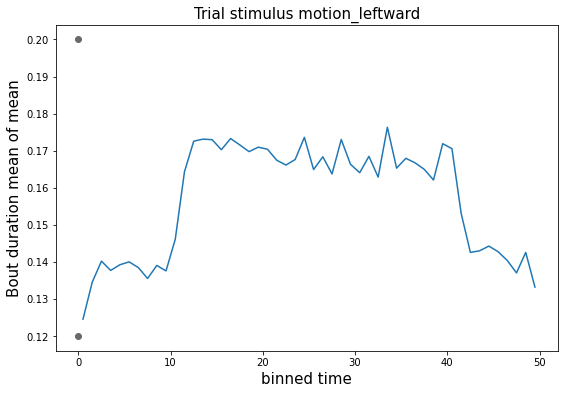

Number of trials for stimulus motion_rightdown45: 1683
Number of fish: 106


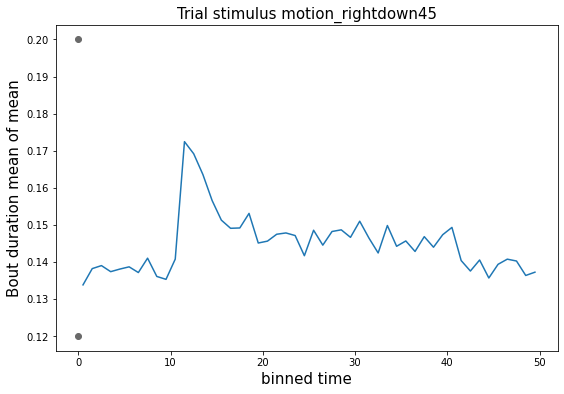

Number of trials for stimulus motion_rightup45: 1636
Number of fish: 107


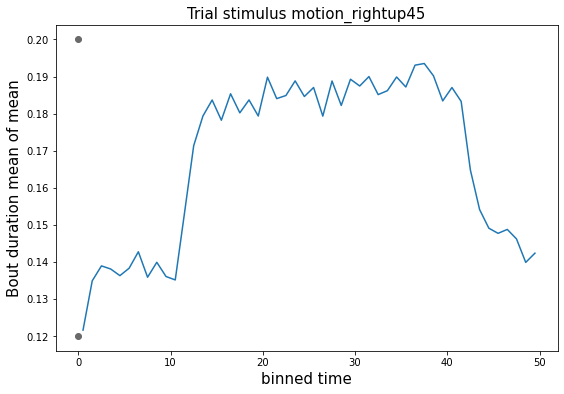

Number of trials for stimulus motion_rightward: 1618
Number of fish: 107


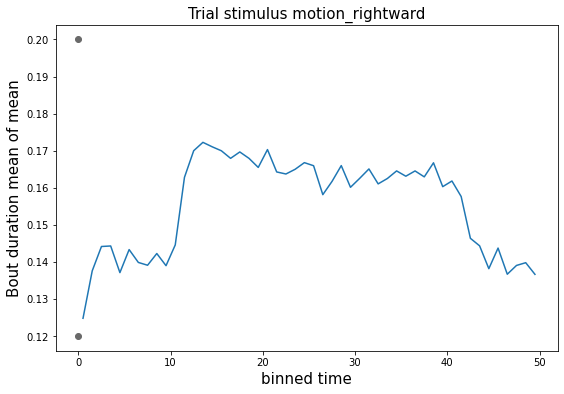

In [73]:
# All the same for bout distance bout duration?

plt.rcParams["figure.figsize"] = (9,6)
stim = df['stimulus_name'].unique().tolist()
for stimulus in stim:
    df_subset =df[df['stimulus_name']==stimulus]
    df_maximums = df_subset.groupby(['fish_ID']).max()
    print('Number of trials for stimulus '+str(stimulus)+': ' +str(sum(df_maximums['trial'])))
    print('Number of fish: ' + str(len(df_maximums)))
    bin_df_subset = bin_data(label_df= df_subset, bin_size = 1,subset = False)
    bin_df_again = bin_df_subset.groupby(['binned_time']).mean()  # again the mean
    bin_df_again.reset_index(inplace = True)
    plt.plot(bin_df_again['binned_time'],bin_df_again['duration'])
    plt.scatter([0,0],[0.12,0.20], color = 'dimgray')
    plt.title('Trial stimulus '+str(stimulus),size = 15)
    plt.xlabel('binned time',size = 15)
    plt.ylabel('Bout duration mean of mean', size = 15)
    plt.show() # 2800 1100

In [64]:
type(df['duration'][0])

numpy.float64

(array([1.38893e+05, 1.16030e+05, 2.73601e+05, 1.67763e+05, 8.24670e+04,
        2.56070e+04, 1.35760e+04, 5.30500e+03, 4.15600e+03, 2.26300e+03,
        2.24100e+03, 1.36700e+03, 1.46900e+03, 9.83000e+02, 9.65000e+02,
        6.82000e+02, 7.38000e+02, 4.73000e+02, 5.35000e+02, 3.75000e+02,
        2.81000e+02, 3.47000e+02, 2.48000e+02, 2.85000e+02, 2.11000e+02,
        1.97000e+02, 1.69000e+02, 1.82000e+02, 1.19000e+02, 1.61000e+02,
        9.70000e+01, 1.23000e+02, 9.50000e+01, 1.11000e+02, 7.70000e+01,
        8.20000e+01, 6.90000e+01, 7.40000e+01, 6.30000e+01, 5.50000e+01]),
 array([0.02222204, 0.07194386, 0.12166568, 0.1713875 , 0.22110932,
        0.27083114, 0.32055296, 0.37027478, 0.4199966 , 0.46971841,
        0.51944023, 0.56916205, 0.61888387, 0.66860569, 0.71832751,
        0.76804933, 0.81777115, 0.86749297, 0.91721479, 0.96693661,
        1.01665843, 1.06638024, 1.11610206, 1.16582388, 1.2155457 ,
        1.26526752, 1.31498934, 1.36471116, 1.41443298, 1.4641548 ,
      

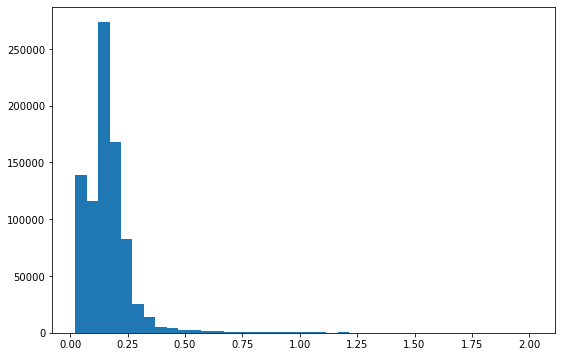

In [65]:
plt.hist(df['duration'],bins = 40)

In [66]:
bin_df = df.groupby(['fish_ID', 'stimulus_name', 'end_time']).mean()
bin_df

index  setup_index  arena_index  \
fish_ID stimulus_name    end_time                                        
0       gray             0.200297      295.0          2.0          0.0   
                         0.279645      684.0          2.0          0.0   
                         0.357775      751.0          2.0          0.0   
                         0.390014      487.0          2.0          0.0   
                         0.461560      565.0          2.0          0.0   
...                                      ...          ...          ...   
106     motion_rightward 49.518077  842509.0          1.0          7.0   
                         49.747044  842534.0          1.0          7.0   
                         49.858161  842230.0          1.0          7.0   
                         49.962089  842327.0          1.0          7.0   
                         49.962518  842510.0          1.0          7.0   

                                    experiment_repeat  trial  duration  \
fish_ID stimulus_name    end_time                                        
0       gray             0.200297                 0.0    8.0  0.122221   
                         0.279645                 0.0   15.0  0.199998   
                         0.357775                 0.0   16.0  0.155554   
                         0.390014                 0.0   12.0  0.177776   
                         0.461560                 0.0   13.0  0.144443   
...                                               ...    ...       ...   
106     motion_rightward 49.518077                0.0    5.0  0.044444   
                         49.747044                0.0    7.0  0.188887   
                         49.858161                0.0    2.0  0.144443   
                         49.962089                0.0    3.0  0.055555   
                         49.962518                0.0    5.0  0.077777   

                                      radius  \
fish_ID stimulus_name    end_time              
0       gray             0.200297   0.099962   
                         0.279645   0.667244   
                         0.357775   0.950227   
                         0.390014   0.712676   
                         0.461560   0.566988   
...                                      ...   
106     motion_rightward 49.518077  0.929946   
                         49.747044  0.898986   
                         49.858161  0.936314   
                         49.962089  0.935011   
                         49.962518       NaN   

                                    estimated_orientation_change_flipped  \
fish_ID stimulus_name    end_time                                          
0       gray             0.200297                              18.138501   
                         0.279645                             -25.592008   
                         0.357775                              28.183566   
                         0.390014                              81.023174   
                         0.461560                             -31.265876   
...                                                                  ...   
106     motion_rightward 49.518077                             -6.648538   
                         49.747044                              3.282394   
                         49.858161                              0.437678   
                         49.962089                              0.653018   
                         49.962518                                   NaN   

                                    left_bouts  right_bouts  straight_bouts  \
fish_ID stimulus_name    end_time                                             
0       gray             0.200297          1.0          0.0             0.0   
                         0.279645          0.0          1.0             0.0   
                         0.357775          1.0          0.0             0.0   
                         0.390014          1.0          0.0             0.0   
                         

In [69]:
#ls = [df_gray,df_motion_downward,df_motion_forward,df_motion_leftdown45]

def bin_data(label_df, bin_size,subset): # why did i add name_of_data here???
    if subset != False:
        label_df = pd.concat(subset)
    time_index = label_df['end_time']
    label_df['binned_time'] = time_index - time_index % bin_size + bin_size / 2
    label_df = label_df.reset_index()
    bin_df = label_df.groupby(['fish_ID', 'stimulus_name', 'binned_time']).mean()
    bin_df['total_bouts'] = bin_df.left_bouts + bin_df.right_bouts + bin_df.straight_bouts
    #Analysed part:
    bin_df['preference_index'] = (bin_df.left_bouts - (bin_df.right_bouts + bin_df.straight_bouts))/bin_df.total_bouts
    bin_df['percentage_left'] = (bin_df.left_bouts / bin_df.total_bouts)*100
    bin_df['percentage_right'] = (bin_df.left_bouts / bin_df.total_bouts)*100
    bin_df['percentage_straight'] = (bin_df.left_bouts / bin_df.total_bouts)*100

   # bin_df['left_bouts_absolute'] = (bin_df.left_bouts_absolute / bin_df.total_bouts)*100
   # bin_df['right_bouts_absolute'] = (bin_df.right_bouts_absolute / bin_df.total_bouts)*100
   # bin_df.to_csv(r"C:\Users\ag-bahl\Desktop\dataframes\binned_df"+str(name_of_data)+".csv")
    return bin_df
bin_df = bin_data(label_df= df, bin_size = 1,subset = False)

In [41]:
bin_df

level_0          index  \
fish_ID stimulus_name    binned_time                                 
0       gray             0.5             367.909091     367.909091   
                         1.5             472.285714     472.285714   
                         2.5             347.625000     347.625000   
                         3.5             350.714286     350.714286   
                         4.5             388.500000     388.500000   
...                                             ...            ...   
106     motion_rightward 45.5         842415.285714  842415.285714   
                         46.5         842305.062500  842305.062500   
                         47.5         842341.700000  842341.700000   
                         48.5         842393.600000  842393.600000   
                         49.5         842369.615385  842369.615385   

                                      setup_index  arena_index  \
fish_ID stimulus_name    binned_time                             
0       gray             0.5                  2.0          0.0   
                         1.5                  2.0          0.0   
                         2.5                  2.0          0.0   
                         3.5                  2.0          0.0   
                         4.5                  2.0          0.0   
...                                           ...          ...   
106     motion_rightward 45.5                 1.0          7.0   
                         46.5                 1.0          7.0   
                         47.5                 1.0          7.0   
                         48.5                 1.0          7.0   
                         49.5                 1.0          7.0   

                                      experiment_repeat      trial    radius  \
fish_ID stimulus_name    binned_time                                           
0       gray             0.5                        0.0   9.000000  0.693017   
                         1.5                        0.0  11.071429  0.676966   
                         2.5                        0.0   8.687500  0.670869   
                         3.5                        0.0   8.571429  0.703268   
                         4.5                        0.0   9.277778  0.693069   
...                                                 ...        ...       ...   
106     motion_rightward 45.5                       0.0   4.571429  0.921990   
                         46.5                       0.0   3.000000  0.934149   
                         47.5                       0.0   3.200000  0.935206   
                         48.5                       0.0   3.900000  0.930723   
                         49.5                       0.0   3.769231  0.929041   

                                      estimated_orientation_change_flipped  \
fish_ID stimulus_name    binned_time                                         
0       gray             0.5                                      2.556826   
                         1.5                                      1.557294   
                         2.5                                      0.528080   
                         3.5                                     -5.200117   
                         4.5                                     -9.630249   
...                                                                    ...   
106     motion_rightward 45.5                                    -0.892854   
                         46.5                                    -0.101674   
                         47.5                                    -0.457424   
                         48.5                                     0.599473   
                         49.5                                    -0.305666   

                                      left_bouts  right_bouts  straight_bouts  \
fish_ID stimulus_name    binned_time                                            
0       gray             0.5            0.454545     0.4

In [42]:
df

,index,setup_index,arena_index,experiment_repeat,fish_ID,folder_name,fish_genotype,fish_age,stimulus_name,trial,...,estimated_orientation_change_flipped,time,left_bouts,right_bouts,straight_bouts,bout_orientation,bout_orientation_absolute,left_bouts_absolute,right_bouts_absolute,binned_time
0,0,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,...,-24.707858,0.978714,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0,0.5
1,1,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,...,-5.445908,2.134261,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0,2.5
2,2,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,...,-36.886872,5.378679,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0,5.5
3,3,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,...,-4.694998,6.578669,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0,6.5
4,4,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,...,-0.539227,8.911983,0.0,0.0,1.0,0.0,-1.0,0.0,1.0,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842530,842530,1,7,0,106,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_rightward,7,...,-1.854388,45.813743,0.0,0.0,1.0,0.0,-1.0,0.0,1.0,45.5
842531,842531,1,7,0,106,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_rightward,7,...,0.572336,46.524848,0.0,0.0,1.0,0.0,1.0,1.0,0.0,46.5
842532,842532,1,7,0,106,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_rightward,7,...,1.344777,48.191501,0.0,0.0,1.0,0.0,1.0,1.0,0.0,48.5
842533,842533,1,7,0,106,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_rightward,7,...,0.153143,49.48038,0.0,0.0,1.0,0.0,1.0,1.0,0.0,49.5


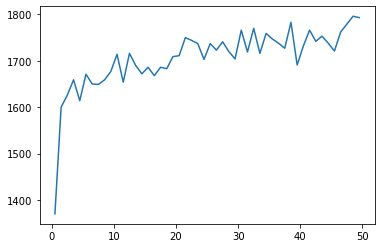

In [56]:
plt.rcParams["figure.figsize"] = (20,20)

def plot_pref(bin_df, pref='preference_index', time_marker=None,plot_together = True):
    num_fish = len(bin_df.index.unique('fish_ID'))
    t_stamp = bin_df.index.unique('binned_time')
    bin_df = bin_df.reset_index()

    mean_df = bin_df.groupby(['stimulus_name', 'binned_time']).mean()
    sem_df = bin_df.groupby(['stimulus_name', 'binned_time']).std() / (num_fish) ** 0.5
    if plot_together == True:
        legend = []
    colors = ['red','blue','cyan','green','orange','magenta','pink','brown','violet','red','cyan']
 #   for variable in
    for stim in mean_df.index.unique('stimulus_name'):
        legend.append(str(stim))
        plot_mean_df = mean_df.xs(stim, level='stimulus_name')
        plot_sem_df = sem_df.xs(stim, level='stimulus_name')

        plt.plot(plot_mean_df.preference_index, marker='o', linewidth=1, markersize=2)
      #  plt.fill_between(t_stamp, plot_mean_df.preference_index + plot_sem_df.preference_index,
       #                  plot_mean_df.preference_index - plot_sem_df.preference_index,
        #                 alpha=0.25, label='_no_legend_')


     #   plt.legend(legend)
     #   plt.show()
    if time_marker != None:
        for t in time_marker:
            plt.axvline(x=t, color='grey', linestyle='--', alpha=0.4, label='_nolegend_')
    plt.plot([0,0],[-1,1], color = 'blue')
    plt.legend(legend)
    plt.title('Sine gratings orientation preference',size = 30)
    plt.xlabel('Time in seconds',size = 30)
    plt.ylabel('Orientation preference', size = 30)
    plt.show()

    return plt


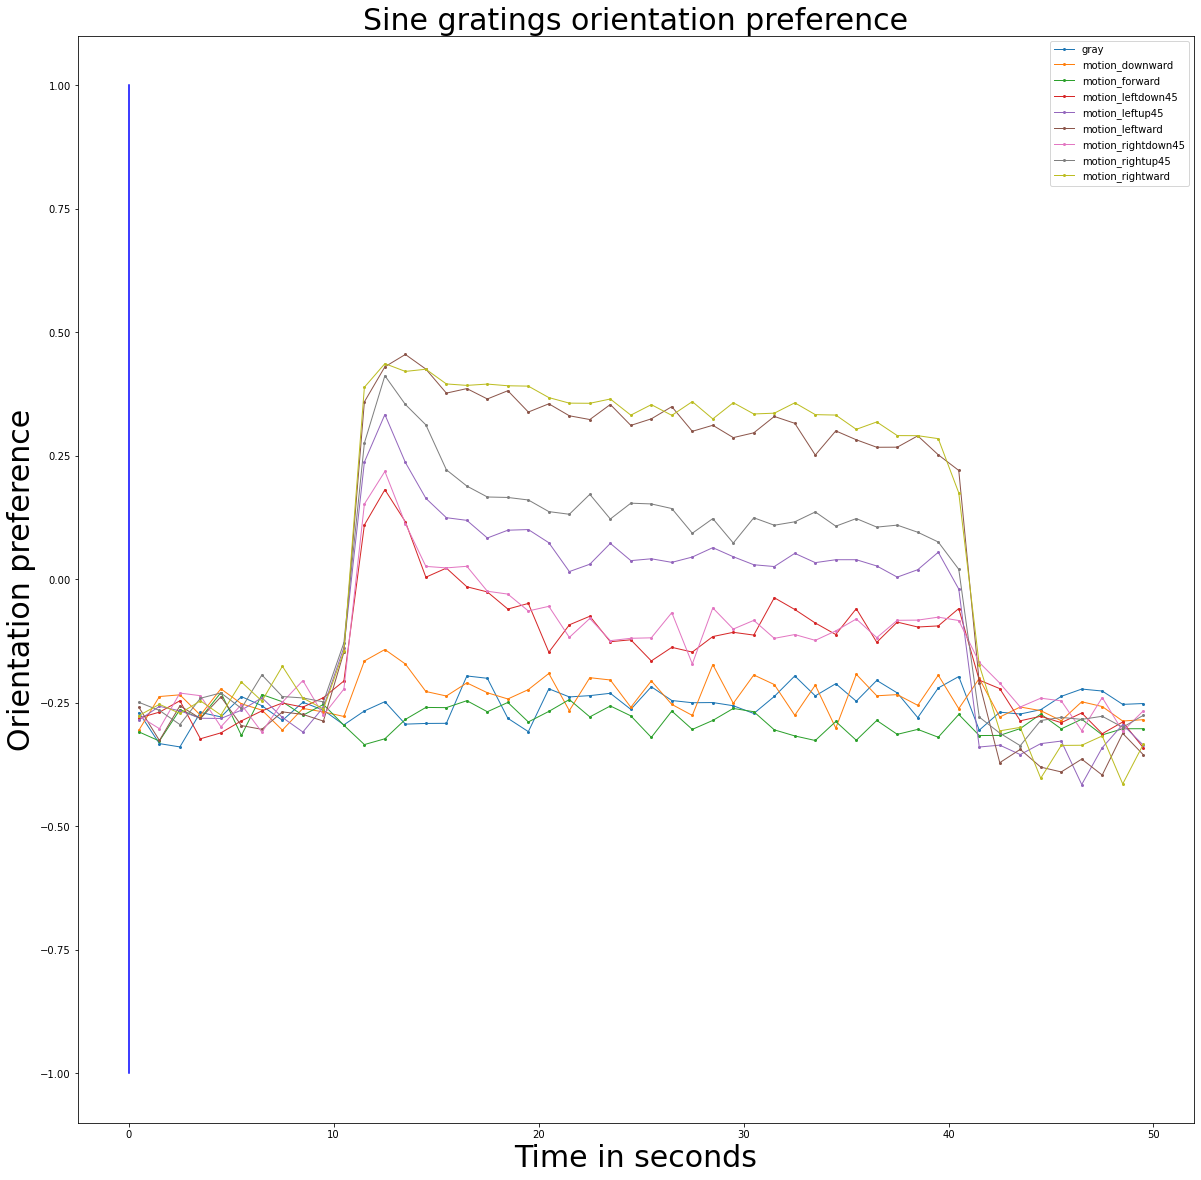

<module 'matplotlib.pyplot' from 'C:\\Users\\ag-bahl\\anaconda3\\envs\\py39\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [57]:
plot_pref(bin_df, pref='preference_index', time_marker=None)